In [1]:
#import packages
from pytrends.request import TrendReq
import csv
import time
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # https://github.com/ResidentMario/missingno
import missingno as miss

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Connecting to Google (WORKS)
pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
#Building Payload
kw_list = ["economia", "Previdência", "Bolsa Família", "Desemprego", "Plano Governo"]
#segmented for national and most populous states in each region
geos = ["BR","BR-AM", "BR-BA", "BR-MS", "BR-SP", "BR-RS"] 
timeframe = ['all']

In [4]:
#Build Trends Over Time for Brazil
pytrends.build_payload(
    kw_list, 
    cat=0, 
    timeframe='all', 
    geo=geos[0])

BR_trends = pytrends.interest_over_time()

In [5]:
filter_BR = BR_trends.loc[BR_trends.index.isin(['2006-11-01','2006-12-01','2010-11-01','2010-12-01','2014-11-01','2014-12-01','2018-11-01','2018-12-01'])]
filter_BR

,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,isPartial
date,,,,,,
2006-11-01,56,10,1,12,2,False
2006-12-01,26,8,1,6,0,False
2010-11-01,31,4,1,14,0,False
2010-12-01,16,3,0,12,0,False
2014-11-01,23,4,2,17,1,False
2014-12-01,13,3,2,17,0,False
2018-11-01,22,5,5,16,2,False
2018-12-01,13,4,6,15,1,False


In [6]:
# region= [geos[0]]*len(filter_BR.index)
# filter_BR['Region'] = region
# filter_BR

In [7]:
# filter_BR

In [8]:
#Build Trends Over Time for Amazonas
pytrends.build_payload(
    kw_list, 
    cat=0, 
    timeframe='all', 
    geo=geos[1])

AM_trends = pytrends.interest_over_time()

In [9]:
filter_AM = AM_trends.loc[AM_trends.index.isin(['2006-11-01','2006-12-01','2010-11-01','2010-12-01','2014-11-01','2014-12-01','2018-11-01','2018-12-01'])]
filter_AM

,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,isPartial
date,,,,,,
2006-11-01,37,0,0,0,0,False
2006-12-01,13,25,0,0,0,False
2010-11-01,12,0,0,2,0,False
2010-12-01,10,3,0,3,0,False
2014-11-01,10,0,1,3,0,False
2014-12-01,5,2,1,4,0,False
2018-11-01,5,1,1,2,0,False
2018-12-01,3,1,2,4,0,False


In [10]:
#Build Trends Over Time for Bahia
pytrends.build_payload(
    kw_list, 
    cat=0, 
    timeframe='all', 
    geo=geos[2])

BA_trends = pytrends.interest_over_time()

In [11]:
filter_BA = BA_trends.loc[BA_trends.index.isin(['2006-11-01','2006-12-01','2010-11-01','2010-12-01','2014-11-01','2014-12-01','2018-11-01','2018-12-01'])]
filter_BA

,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,isPartial
date,,,,,,
2006-11-01,28,7,3,6,1,False
2006-12-01,8,3,0,2,0,False
2010-11-01,18,2,1,6,0,False
2010-12-01,13,1,0,6,0,False
2014-11-01,12,2,2,9,0,False
2014-12-01,9,2,1,9,0,False
2018-11-01,13,3,4,6,1,False
2018-12-01,6,2,6,9,0,False


In [12]:
#Build Trends Over Time for Mato Grosso do Sul
pytrends.build_payload(
    kw_list, 
    cat=0, 
    timeframe='all', 
    geo=geos[3])

MS_trends = pytrends.interest_over_time()

In [13]:
filter_MS = MS_trends.loc[BA_trends.index.isin(['2006-11-01','2006-12-01','2010-11-01','2010-12-01','2014-11-01','2014-12-01','2018-11-01','2018-12-01'])]
filter_MS

,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,isPartial
date,,,,,,
2006-11-01,7,0,0,0,0,False
2006-12-01,0,4,0,4,0,False
2010-11-01,4,0,0,0,0,False
2010-12-01,0,0,0,3,0,False
2014-11-01,4,1,0,2,0,False
2014-12-01,2,0,0,1,0,False
2018-11-01,3,0,1,2,0,False
2018-12-01,2,0,1,2,0,False


In [14]:
#Build Trends Over Time for Sao Paulo
pytrends.build_payload(
    kw_list, 
    cat=0, 
    timeframe='all', 
    geo=geos[4])

SP_trends = pytrends.interest_over_time()

In [15]:
filter_SP = SP_trends.loc[SP_trends.index.isin(['2006-11-01','2006-12-01','2010-11-01','2010-12-01','2014-11-01','2014-12-01','2018-11-01','2018-12-01'])]
filter_SP

,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,isPartial
date,,,,,,
2006-11-01,46,12,1,17,2,False
2006-12-01,17,13,2,10,0,False
2010-11-01,34,2,0,19,0,False
2010-12-01,16,4,1,18,0,False
2014-11-01,24,4,2,18,1,False
2014-12-01,13,4,1,18,0,False
2018-11-01,22,5,4,18,2,False
2018-12-01,11,4,3,15,0,False


In [16]:
#Build Trends Over Time for Rio Grande do Sul
pytrends.build_payload(
    kw_list, 
    cat=0, 
    timeframe='all', 
    geo=geos[5])

RS_trends = pytrends.interest_over_time()

In [17]:
filter_RS = RS_trends.loc[RS_trends.index.isin(['2006-11-01','2006-12-01','2010-11-01','2010-12-01','2014-11-01','2014-12-01','2018-11-01','2018-12-01'])]
filter_RS

,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,isPartial
date,,,,,,
2006-11-01,55,17,2,7,0,False
2006-12-01,27,8,0,5,3,False
2010-11-01,29,1,0,13,1,False
2010-12-01,14,8,0,9,0,False
2014-11-01,24,3,2,12,1,False
2014-12-01,14,3,1,10,0,False
2018-11-01,21,5,3,16,1,False
2018-12-01,11,4,4,15,1,False


In [18]:
filter_BR = filter_BR.drop('isPartial', 1)
filter_AM = filter_AM.drop('isPartial', 1)
filter_BA = filter_BA.drop('isPartial', 1)
filter_MS = filter_MS.drop('isPartial', 1)
filter_SP = filter_SP.drop('isPartial', 1)
filter_RS = filter_RS.drop('isPartial', 1)

In [19]:
filter_BR


,economia,Previdência,Bolsa Família,Desemprego,Plano Governo
date,,,,,
2006-11-01,56,10,1,12,2
2006-12-01,26,8,1,6,0
2010-11-01,31,4,1,14,0
2010-12-01,16,3,0,12,0
2014-11-01,23,4,2,17,1
2014-12-01,13,3,2,17,0
2018-11-01,22,5,5,16,2
2018-12-01,13,4,6,15,1


In [20]:
filter_BR_reset = filter_BR.reset_index()


In [21]:
filter_BR_reset

,date,economia,Previdência,Bolsa Família,Desemprego,Plano Governo
0,2006-11-01,56,10,1,12,2
1,2006-12-01,26,8,1,6,0
2,2010-11-01,31,4,1,14,0
3,2010-12-01,16,3,0,12,0
4,2014-11-01,23,4,2,17,1
5,2014-12-01,13,3,2,17,0
6,2018-11-01,22,5,5,16,2
7,2018-12-01,13,4,6,15,1


In [22]:
filter_BR_melt = pd.melt(filter_BR_reset,id_vars=['date'], var_name="keyword", value_name="popularity")

In [23]:
filter_BR_melt.reset_index()

,index,date,keyword,popularity
0,0,2006-11-01,economia,56
1,1,2006-12-01,economia,26
2,2,2010-11-01,economia,31
3,3,2010-12-01,economia,16
4,4,2014-11-01,economia,23
5,5,2014-12-01,economia,13
6,6,2018-11-01,economia,22
7,7,2018-12-01,economia,13
8,8,2006-11-01,Previdência,10
9,9,2006-12-01,Previdência,8


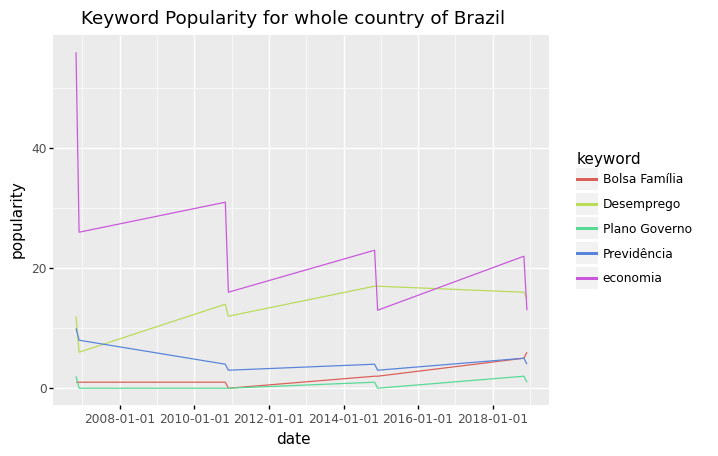

<ggplot: (8782117645535)>

In [24]:

BR_plot   = (
                ggplot(filter_BR_melt, aes(x = "date", y = "popularity", color="keyword"))+
                  geom_line() +
                ggtitle("Keyword Popularity for whole country of Brazil")
            )
BR_plot

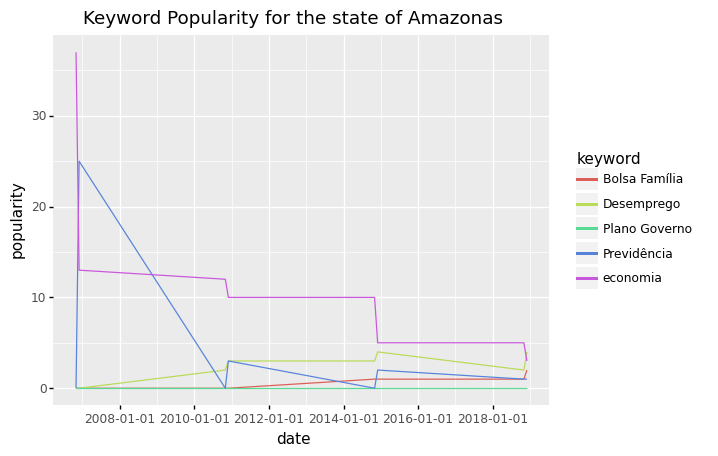

<ggplot: (8782168913439)>

In [25]:
#Conditions to generate Graphs for Amazonas
filter_AM_reset = filter_AM.reset_index()
filter_AM_melt = pd.melt(filter_AM_reset,id_vars=['date'], var_name="keyword", value_name="popularity")
filter_AM_melt.reset_index()

#Generating Graph
AM_plot = (
                ggplot(filter_AM_melt, aes(x = "date", y = "popularity", color="keyword"))+
                  geom_line() +
                ggtitle("Keyword Popularity for the state of Amazonas")
            )
ggsave(plot=AM_plot, filename='AM_plot.png', dpi=300)
AM_plot

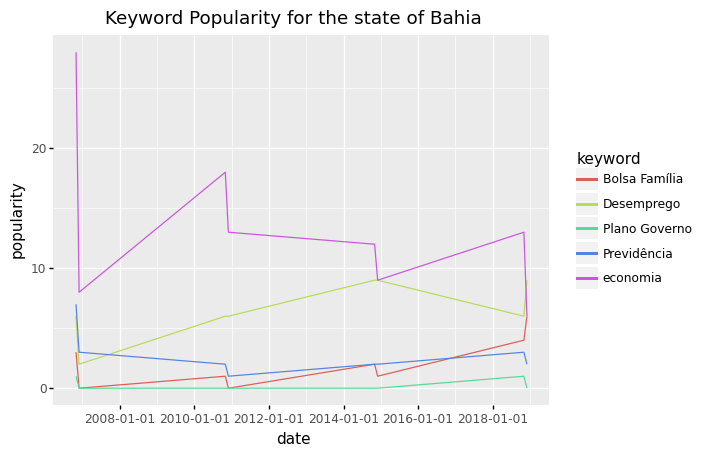

<ggplot: (8782187570938)>

In [26]:
#Conditions to generate Graphs for Bahia
filter_BA_reset = filter_BA.reset_index()
filter_BA_melt = pd.melt(filter_BA_reset,id_vars=['date'], var_name="keyword", value_name="popularity")
filter_BA_melt.reset_index()

#Generating Graph
BA_plot =  (
                ggplot(filter_BA_melt, aes(x = "date", y = "popularity", color="keyword"))+
                  geom_line() +
                ggtitle("Keyword Popularity for the state of Bahia")
            )

ggsave(plot=BA_plot, filename='BA_plot.png', dpi=300)
BA_plot

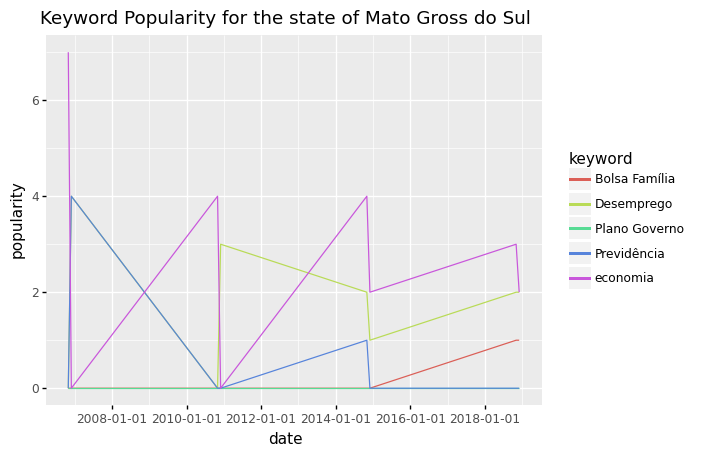

<ggplot: (8782136103940)>

In [27]:
#Conditions to generate Graphs for Mato Grosso do Sul
filter_MS_reset = filter_MS.reset_index()
filter_MS_melt = pd.melt(filter_MS_reset,id_vars=['date'], var_name="keyword", value_name="popularity")
filter_MS_melt.reset_index()

#Generating Graph
MS_plot =       (
                    ggplot(filter_MS_melt, aes(x = "date", y = "popularity", color="keyword"))+
                      geom_line() +
                    ggtitle("Keyword Popularity for the state of Mato Gross do Sul")
                )

ggsave(plot=MS_plot, filename='MS_plot.png', dpi=300)
MS_plot

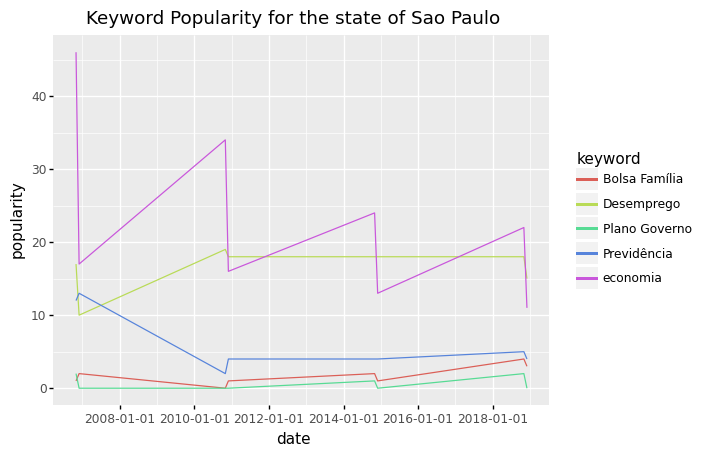

<ggplot: (8782187533427)>

In [28]:
#Conditions to generate Graphs for Sao Paulo
filter_SP_reset = filter_SP.reset_index()
filter_SP_melt = pd.melt(filter_SP_reset,id_vars=['date'], var_name="keyword", value_name="popularity")
filter_SP_melt.reset_index()

#Generating Graph
SP_plot =   (
                ggplot(filter_SP_melt, aes(x = "date", y = "popularity", color="keyword"))+
                  geom_line() +
                ggtitle("Keyword Popularity for the state of Sao Paulo")
            )

ggsave(plot=SP_plot, filename='SP_plot.png', dpi=300)
SP_plot

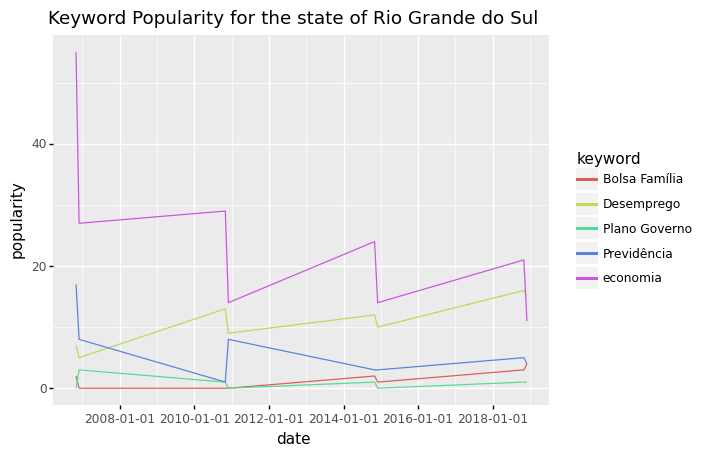

<ggplot: (8782136069133)>

In [29]:
#Conditions to generate Graphs for Rio Grande do Sul
filter_RS_reset = filter_RS.reset_index()
filter_RS_melt = pd.melt(filter_RS_reset,id_vars=['date'], var_name="keyword", value_name="popularity")
filter_RS_melt.reset_index()

#Generating Graph
RS_plot =   (
                ggplot(filter_RS_melt, aes(x = "date", y = "popularity", color="keyword"))+
                  geom_line() +
                ggtitle("Keyword Popularity for the state of Rio Grande do Sul")
            )

ggsave(plot=RS_plot, filename='RS_plot.png', dpi=300)
RS_plot

In [30]:
PT = 1
Not_PT = 0

In [31]:
#Preparing to merge all data - Brazil
region_BR= [geos[0]]*len(filter_BR_reset.index)
filter_BR_reset['Region'] = region_BR
filter_BR_reset['Labor'] = [1,1,1,1,1,1,0,0]
filter_BR_reset

,date,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,Region,Labor
0,2006-11-01,56,10,1,12,2,BR,1
1,2006-12-01,26,8,1,6,0,BR,1
2,2010-11-01,31,4,1,14,0,BR,1
3,2010-12-01,16,3,0,12,0,BR,1
4,2014-11-01,23,4,2,17,1,BR,1
5,2014-12-01,13,3,2,17,0,BR,1
6,2018-11-01,22,5,5,16,2,BR,0
7,2018-12-01,13,4,6,15,1,BR,0


In [32]:
#Preparing to merge all data - Amazonas
region_AM= [geos[1]]*len(filter_AM_reset.index)
filter_AM_reset['Region'] = region_AM
filter_AM_reset['Labor'] = [1,1,1,1,1,1,0,0]
filter_AM_reset

,date,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,Region,Labor
0,2006-11-01,37,0,0,0,0,BR-AM,1
1,2006-12-01,13,25,0,0,0,BR-AM,1
2,2010-11-01,12,0,0,2,0,BR-AM,1
3,2010-12-01,10,3,0,3,0,BR-AM,1
4,2014-11-01,10,0,1,3,0,BR-AM,1
5,2014-12-01,5,2,1,4,0,BR-AM,1
6,2018-11-01,5,1,1,2,0,BR-AM,0
7,2018-12-01,3,1,2,4,0,BR-AM,0


In [33]:
#Preparing to merge all data - Bahia
region_BA= [geos[2]]*len(filter_BA_reset.index)
filter_BA_reset['Region'] = region_BA
filter_BA_reset['Labor'] = [1,1,1,1,1,1,1,1]
filter_BA_reset

,date,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,Region,Labor
0,2006-11-01,28,7,3,6,1,BR-BA,1
1,2006-12-01,8,3,0,2,0,BR-BA,1
2,2010-11-01,18,2,1,6,0,BR-BA,1
3,2010-12-01,13,1,0,6,0,BR-BA,1
4,2014-11-01,12,2,2,9,0,BR-BA,1
5,2014-12-01,9,2,1,9,0,BR-BA,1
6,2018-11-01,13,3,4,6,1,BR-BA,1
7,2018-12-01,6,2,6,9,0,BR-BA,1


In [34]:
#Preparing to merge all data - Mato Grosso do Sul
region_MS= [geos[3]]*len(filter_MS_reset.index)
filter_MS_reset['Region'] = region_MS
filter_MS_reset['Labor'] = [0,0,0,0,0,0,0,0]
filter_MS_reset

,date,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,Region,Labor
0,2006-11-01,7,0,0,0,0,BR-MS,0
1,2006-12-01,0,4,0,4,0,BR-MS,0
2,2010-11-01,4,0,0,0,0,BR-MS,0
3,2010-12-01,0,0,0,3,0,BR-MS,0
4,2014-11-01,4,1,0,2,0,BR-MS,0
5,2014-12-01,2,0,0,1,0,BR-MS,0
6,2018-11-01,3,0,1,2,0,BR-MS,0
7,2018-12-01,2,0,1,2,0,BR-MS,0


In [35]:
#Preparing to merge all data - Sao Paulo
region_SP= [geos[4]]*len(filter_SP_reset.index)
filter_SP_reset['Region'] = region_SP
filter_SP_reset['Labor'] = [0,0,0,0,0,0,0,0]
filter_SP_reset

,date,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,Region,Labor
0,2006-11-01,46,12,1,17,2,BR-SP,0
1,2006-12-01,17,13,2,10,0,BR-SP,0
2,2010-11-01,34,2,0,19,0,BR-SP,0
3,2010-12-01,16,4,1,18,0,BR-SP,0
4,2014-11-01,24,4,2,18,1,BR-SP,0
5,2014-12-01,13,4,1,18,0,BR-SP,0
6,2018-11-01,22,5,4,18,2,BR-SP,0
7,2018-12-01,11,4,3,15,0,BR-SP,0


In [36]:
#Preparing to merge all data - Rio Grande do SUl
region_RS= [geos[5]]*len(filter_RS_reset.index)
filter_RS_reset['Region'] = region_RS
filter_RS_reset['Labor'] = [0,0,0,0,0,0,0,0]
filter_RS_reset

,date,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,Region,Labor
0,2006-11-01,55,17,2,7,0,BR-RS,0
1,2006-12-01,27,8,0,5,3,BR-RS,0
2,2010-11-01,29,1,0,13,1,BR-RS,0
3,2010-12-01,14,8,0,9,0,BR-RS,0
4,2014-11-01,24,3,2,12,1,BR-RS,0
5,2014-12-01,14,3,1,10,0,BR-RS,0
6,2018-11-01,21,5,3,16,1,BR-RS,0
7,2018-12-01,11,4,4,15,1,BR-RS,0


In [37]:
final = pd.concat([filter_BR_reset,filter_AM_reset],sort=False)
final = pd.concat([final,filter_BA_reset],sort=False)
final = pd.concat([final,filter_MS_reset],sort=False)
final = pd.concat([final,filter_SP_reset],sort=False)
final = pd.concat([final,filter_RS_reset],sort=False)
final

,date,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,Region,Labor
0,2006-11-01,56,10,1,12,2,BR,1
1,2006-12-01,26,8,1,6,0,BR,1
2,2010-11-01,31,4,1,14,0,BR,1
3,2010-12-01,16,3,0,12,0,BR,1
4,2014-11-01,23,4,2,17,1,BR,1
5,2014-12-01,13,3,2,17,0,BR,1
6,2018-11-01,22,5,5,16,2,BR,0
7,2018-12-01,13,4,6,15,1,BR,0
0,2006-11-01,37,0,0,0,0,BR-AM,1
1,2006-12-01,13,25,0,0,0,BR-AM,1


In [38]:
final['BR'] = 1*(final['Region']=='BR')
final['AM'] = 1*(final['Region']=='BR-AM')
final['BA'] = 1*(final['Region']=='BR-BA')
final['MS'] = 1*(final['Region']=='BR-MS')
final['SP'] = 1*(final['Region']=='BR-SP')
final['RS'] = 1*(final['Region']=='BR-RS')

<AxesSubplot:>

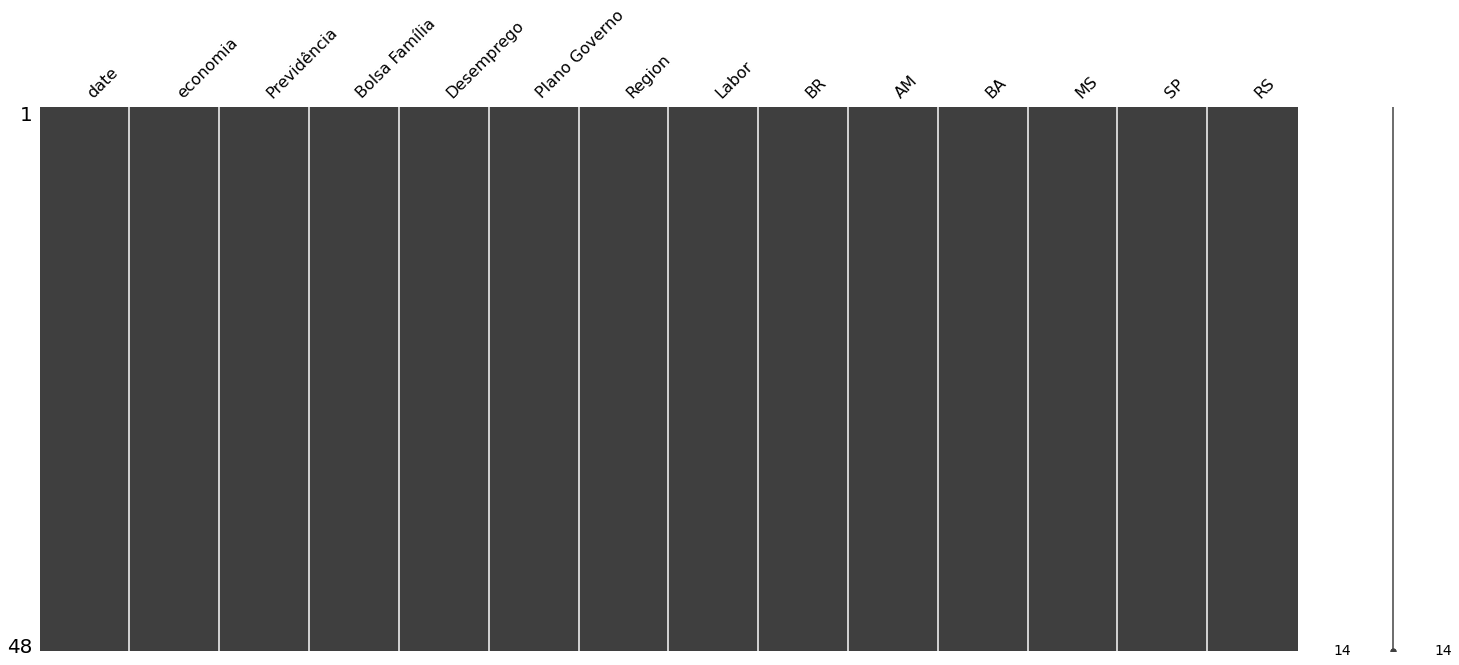

In [39]:
miss.matrix(final)

In [40]:
# Train-Test split (just using Pandas)
y = final[['Labor']]
X = final.drop(columns=['Labor',"date","Region"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=73662)

In [41]:
train_X

,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,BR,AM,BA,MS,SP,RS
4,24,4,2,18,1,0,0,0,0,1,0
6,22,5,5,16,2,1,0,0,0,0,0
1,13,25,0,0,0,0,1,0,0,0,0
4,4,1,0,2,0,0,0,0,1,0,0
0,46,12,1,17,2,0,0,0,0,1,0
4,23,4,2,17,1,1,0,0,0,0,0
0,56,10,1,12,2,1,0,0,0,0,0
2,29,1,0,13,1,0,0,0,0,0,1
5,13,4,1,18,0,0,0,0,0,1,0
5,2,0,0,1,0,0,0,0,1,0,0


In [42]:
# Print off the split count 
print("Training Data:",train_X.shape[0],
      "\nTest Data:",test_X.shape[0])

print(train_X.shape[0]/final.shape[0])
print(test_X.shape[0]/final.shape[0])

Training Data: 36 
Test Data: 12
0.75
0.25


In [43]:
# Look at the head of the data
train_X.head()

,economia,Previdência,Bolsa Família,Desemprego,Plano Governo,BR,AM,BA,MS,SP,RS
4,24,4,2,18,1,0,0,0,0,1,0
6,22,5,5,16,2,1,0,0,0,0,0
1,13,25,0,0,0,0,1,0,0,0,0
4,4,1,0,2,0,0,0,0,1,0,0
0,46,12,1,17,2,0,0,0,0,1,0


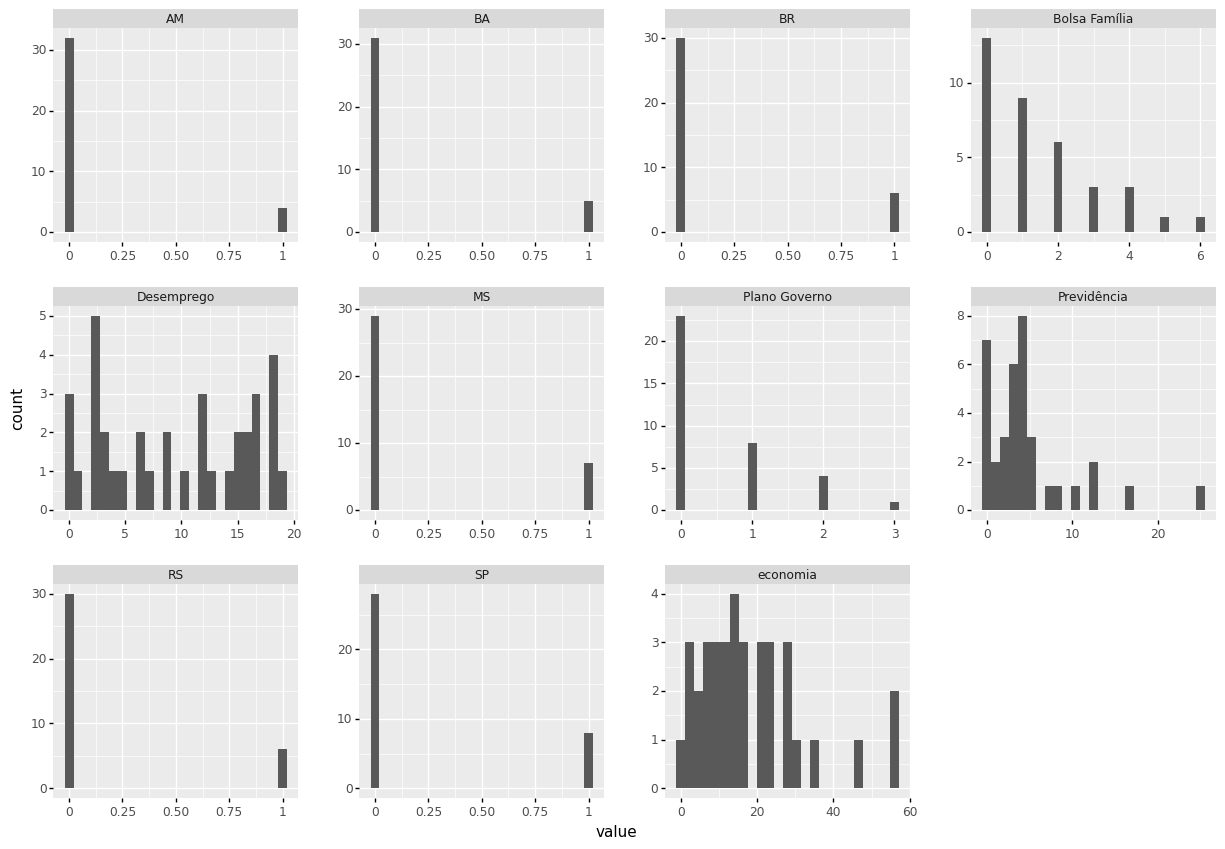

<ggplot: (8782188460514)>

In [44]:
# Plot the Variables to see data distribution
d = train_X.select_dtypes(include=["int","float"]).melt()

distribution_plot = (
                        ggplot(d,aes(x="value")) +
                        geom_histogram(bins=25) +
                        facet_wrap("variable",scales='free') +
                        theme(figure_size=(15,10),
                              subplots_adjust={'wspace':.25,'hspace':.3})
                    )

ggsave(plot=distribution_plot, filename='distribution_plot.png', dpi=300)
distribution_plot

In [45]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=73662)

In [46]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

In [47]:
search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4],
    'model__n_estimators':[500,1000,1500],
    'model__max_features':[4,8,12,16]}
    
]

In [48]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search.fit(train_X,train_y.Labor)


/Users/juliezantao/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/juliezantao/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/juliezantao/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/juliezantao/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 109, in __get__
    if not self.check(obj):
  File "/Users/juliezantao/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 45, in check
    getattr(self._final_estimator, attr)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

GridSearchCV(cv=KFold(n_splits=5, random_state=73662, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier(max_depth=2,
                                                           max_features=4,
                                                           n_estimators=500)],
                          'model__max_depth': [2, 3, 4],
                          'model__max_features': [4, 8, 12, 16],
                          'model__n_estimators': [500, 1000, 1500]}],
             scoring='roc_auc')

In [49]:
search.best_score_

1.0

In [50]:
search.best_params_

{'model': RandomForestClassifier(max_depth=2, max_features=4, n_estimators=500),
 'model__max_depth': 2,
 'model__max_features': 4,
 'model__n_estimators': 500}

In [51]:
rf_mod = search.best_estimator_

In [52]:
m.roc_auc_score(test_y,rf_mod.predict_proba(test_X)[:,1])

1.0

In [53]:
m.accuracy_score(test_y,rf_mod.predict(test_X))

0.75

In [54]:
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=5)

In [55]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,BA,0.138889,0.024845,0.089198,0.188579
1,BR,0.122222,0.028328,0.065566,0.178878
2,AM,0.094444,0.013608,0.067228,0.121661
3,MS,0.055556,0.035136,-0.014717,0.125828
4,economia,0.016667,0.013608,-0.010550,0.043883
5,RS,0.016667,0.013608,-0.010550,0.043883
6,SP,0.011111,0.013608,-0.016105,0.038328
7,Bolsa Família,0.005556,0.011111,-0.016667,0.027778
8,Desemprego,0.005556,0.011111,-0.016667,0.027778
9,Previdência,0.000000,0.000000,0.000000,0.000000


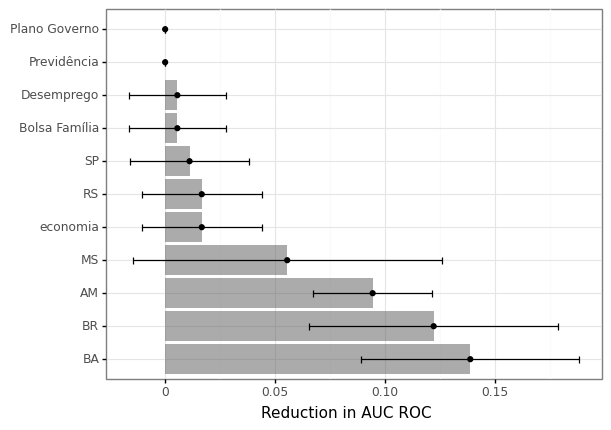

<ggplot: (8782187606736)>

In [56]:
# Plot
AUC_plot  =  (
                ggplot(vi_dat,
                      aes(x="variable",y="vi")) +
                geom_col(alpha=.5) +
                geom_point() +
                geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
                theme_bw() +
                scale_x_discrete(limits=vi_dat.variable.tolist()) +
                coord_flip() +
                labs(y="Reduction in AUC ROC",x="")
            )

ggsave(plot=AUC_plot, filename='AUC_plot.png', dpi=300)
AUC_plot

In [57]:
# Train-Test split (just using Pandas)
b = final[['Labor']]
a = final.drop(columns=['Labor',"date","Region", "MS", "RS", "SP","BA", "AM", "BR"])
train_a, test_a, train_b, test_b = train_test_split(a,b,test_size = .25,random_state=73662)

In [58]:
# Print off the split count 
print("Training Data:",train_a.shape[0],
      "\nTest Data:",test_a.shape[0])

print(train_a.shape[0]/final.shape[0])
print(test_a.shape[0]/final.shape[0])

Training Data: 36 
Test Data: 12
0.75
0.25


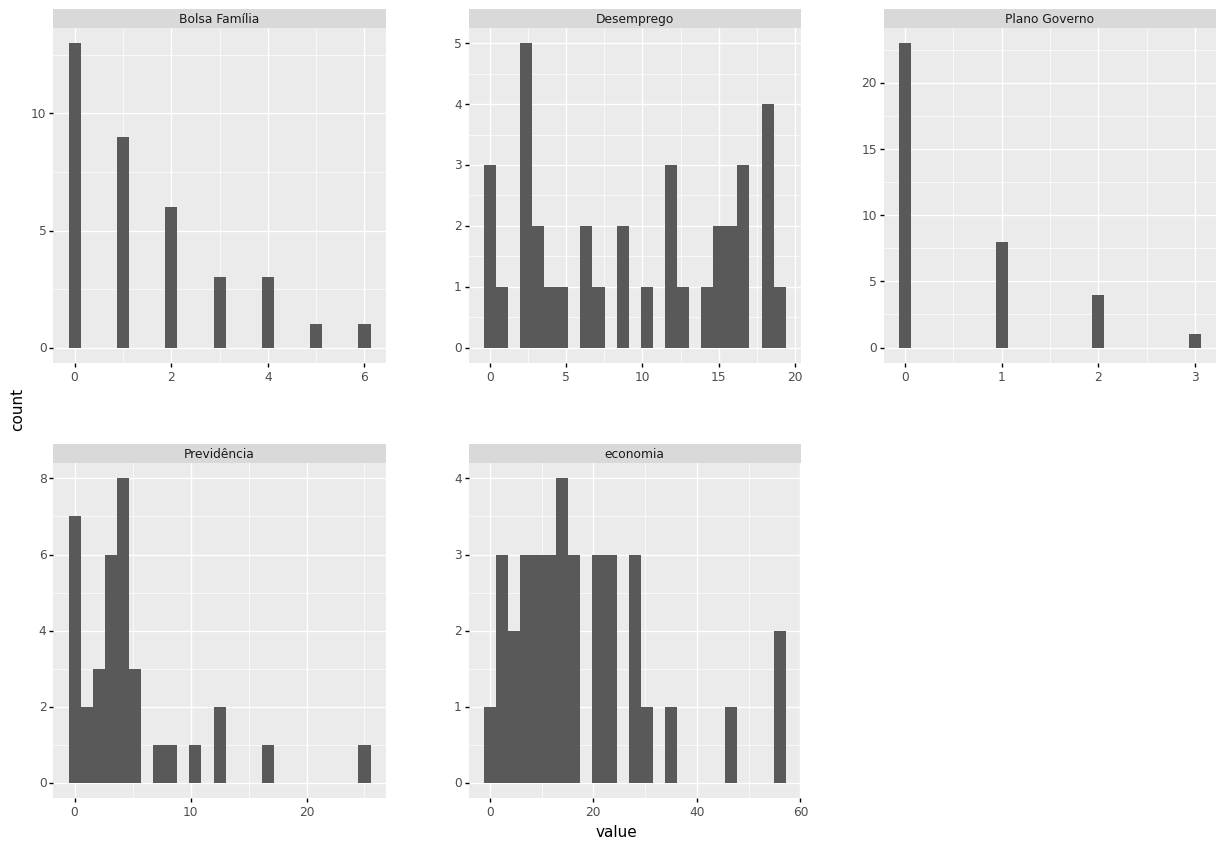

<ggplot: (8782168893061)>

In [59]:
# Plot the Variables to see data distribution
d = train_a.select_dtypes(include=["int","float"]).melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(15,10),
          subplots_adjust={'wspace':.25,'hspace':.3})
)

In [60]:
# Set the folds index to ensure comparable samples
fold_generator2 = KFold(n_splits=5, shuffle=True,random_state=73662)

In [61]:
pipe2 = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

In [62]:
search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4],
    'model__n_estimators':[500,1000,1500],
    'model__max_features':[4,8,12,16]}
    
]

In [63]:
search2 = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search2.fit(train_a,train_b.Labor)


/Users/juliezantao/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/juliezantao/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/juliezantao/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/juliezantao/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 109, in __get__
    if not self.check(obj):
  File "/Users/juliezantao/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 45, in check
    getattr(self._final_estimator, attr)
AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

GridSearchCV(cv=KFold(n_splits=5, random_state=73662, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier(max_depth=3,
                                                           max_features=4,
                                                           n_estimators=1000)],
                          'model__max_depth': [2, 3, 4],
                          'model__max_features': [4, 8, 12, 16],
                          'model__n_estimators': [500, 1000, 1500]}],
             scoring='roc_auc')

In [64]:
search2.best_score_

0.67

In [65]:
search2.best_params_

{'model': RandomForestClassifier(max_depth=3, max_features=4, n_estimators=1000),
 'model__max_depth': 3,
 'model__max_features': 4,
 'model__n_estimators': 1000}

In [66]:
rf_mod2 = search2.best_estimator_

In [67]:
m.roc_auc_score(train_b,rf_mod2.predict_proba(train_a)[:,1])

0.9805194805194806

In [68]:
m.accuracy_score(train_b,rf_mod2.predict(train_a))

0.9444444444444444

In [69]:
vi2 = permutation_importance(rf_mod2,train_a,train_b,n_repeats=5)